In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('cleaned-data/total.csv')

In [3]:
df.head()

,objectid,issuing_agency_code,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,location,disposition_type,fine_amount,total_paid,xcoord,ycoord,latitude,longitude,year,month,date,day,hour,minute
0,60327097,80.0,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,900 2ND ST NE,Dismissed,100.0,0,399661.0,137013.0,38.901,-77.004,2017,9,5,1,11,30
1,60345241,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALBAMA AVE SE,Liable - System,25.0,60,401049.0,130794.0,38.845,-76.988,2017,9,26,1,10,35
2,60345242,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALABAMA AV SE,Liable - System,25.0,60,401049.0,130794.0,38.845,-76.988,2017,9,26,1,11,35
3,60345243,57.0,METRO POLICE,MTP,P170,FAILURE TO DISPLAY CURRENT TAGS,1290 ALABAMA AV SE,Liable - System,100.0,240,401049.0,130794.0,38.845,-76.988,2017,9,26,1,11,40
4,60345244,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALABAMA AV SE,Other,25.0,25,401049.0,130794.0,38.845,-76.988,2017,9,26,1,11,41


In [4]:
df.shape

(2669807, 20)

In [5]:
df.isnull().sum()

objectid                0
issuing_agency_code     0
issuing_agency_name     0
issuing_agency_short    0
violation_code          0
violation_proc_desc     0
location                0
disposition_type        0
fine_amount             0
total_paid              0
xcoord                  0
ycoord                  0
latitude                0
longitude               0
year                    0
month                   0
date                    0
day                     0
hour                    0
minute                  0
dtype: int64

In [6]:
df.columns

Index(['objectid', 'issuing_agency_code', 'issuing_agency_name',
       'issuing_agency_short', 'violation_code', 'violation_proc_desc',
       'location', 'disposition_type', 'fine_amount', 'total_paid', 'xcoord',
       'ycoord', 'latitude', 'longitude', 'year', 'month', 'date', 'day',
       'hour', 'minute'],
      dtype='object')

In [7]:
df['disposition_type'].value_counts(normalize=True)

Other               0.662185
Liable - System     0.223375
Dismissed           0.060509
Liable              0.051959
Void                0.001100
Continued           0.000558
Administrative      0.000270
Liable - Traffic    0.000045
Name: disposition_type, dtype: float64

In [8]:
df.groupby(by = 'disposition_type').mean()[['total_paid','fine_amount']]

,total_paid,fine_amount
disposition_type,,
Administrative,45.118056,55.277778
Continued,40.881128,75.809268
Dismissed,1.020254,75.236103
Liable,45.284069,69.663963
Liable - System,36.907208,60.394485
Liable - Traffic,0.000000,25.630252
Other,47.535042,51.975895
Void,4.320735,59.584610


In [9]:
fine = df[df['disposition_type'] == 'Other'][['objectid','disposition_type','total_paid', 'fine_amount','longitude','latitude']]

In [10]:
fine_0 = fine[fine['total_paid']== 0]

In [11]:
fine_0.to_csv('datasets/fine_0.csv')

## Clustering

### K-Means

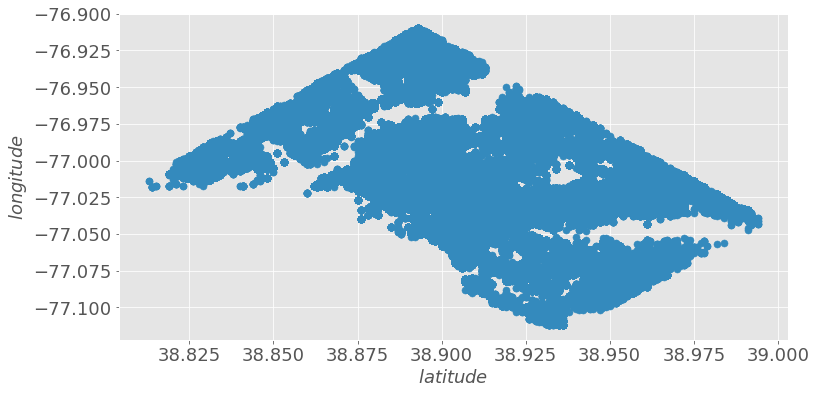

In [12]:
# Plot the scatter
ax = df.plot(kind="scatter", x="latitude", y="longitude", figsize=(12,6), s=50)
plt.xlabel("$latitude$", fontsize=18)
plt.ylabel("$longitude$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [13]:
df[['latitude','longitude']].describe()

,latitude,longitude
count,2.669807e+06,2.669807e+06
mean,3.890623e+01,-7.702495e+01
std,2.119231e-02,2.670738e-02
min,3.881300e+01,-7.711200e+01
25%,3.889600e+01,-7.704100e+01
50%,3.890300e+01,-7.702700e+01
75%,3.891600e+01,-7.701200e+01
max,3.899400e+01,-7.691000e+01


In [14]:
# Select only latitude and longitude
X = df[['latitude','longitude']]

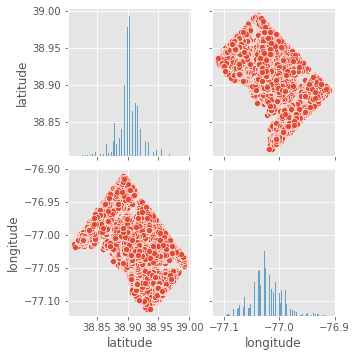

In [15]:
sns.pairplot(X);

In [16]:
# standarize data for preparation
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)
X_sc[:5]

array([[-0.24696307,  0.7845573 ],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279]])

In [17]:
# Instantiate k-means
km = KMeans(n_clusters=3)
km.fit(X_sc)

KMeans(n_clusters=3)

In [18]:
# Check out centroids
km.cluster_centers_

array([[-0.83142747,  1.2364122 ],
       [ 1.60576339, -0.62184864],
       [-0.09396167, -0.3619603 ]])

In [19]:
# attach predicted cluster to original points
X['cluster'] = km.labels_
X.head(3)

<ipython-input-19-5f1d01be826c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


,latitude,longitude,cluster
0,38.901,-77.004,0
1,38.845,-76.988,0
2,38.845,-76.988,0


In [20]:
# check mean difference
X.groupby(by = 'cluster').mean()

,latitude,longitude
cluster,,
0,38.888618,-76.991932
1,38.940394,-77.041590
2,38.904278,-77.034629


In [21]:
## Create a dataframe for cluster_centers (centroids)
centroid_X = pd.DataFrame(
    ss.inverse_transform(km.cluster_centers_),
    columns=['latitude','longitude']
)
centroid_X

,latitude,longitude
0,38.888614,-76.991932
1,38.940264,-77.041561
2,38.904242,-77.034620


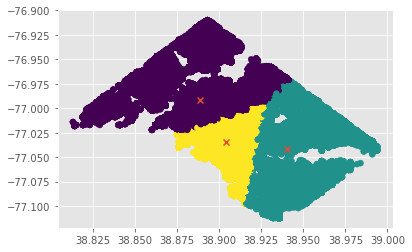

In [22]:
plt.scatter(x=X['latitude'],y=X['longitude'],c =X['cluster'])
plt.scatter(centroid_X['latitude'],centroid_X['longitude'],marker='x');

### DBSCAN